In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from alg import sift, orb, utils

## Testing

In [3]:
import psutil

In [ ]:
from tqdm.notebook import tqdm
from itertools import product
from functools import partial
image_dir     = 'data_check-20250922T083054Z-1-001/data_check'
image_paths   = list(map(utils.listdir, utils.listdir(image_dir)))

match_params = dict(
    n_features=list(range(250, 1250, 250)),
    checks=list(range(25, 125, 25)),
    thr=[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9],
    k=[2],
)

keys, match_params = zip(*match_params.items())
match_params = product(*match_params)
match_params = [{k:v for k, v in zip(keys, _)} for _ in match_params]

for p in tqdm(match_params):
    utils.process_dataset(
        dataset_path=image_dir, 
        results_folder=f'results/final/sift-v1/{utils.timestamp()}',
        match_fn=partial(sift.match_fingerprints, **p),
        name='SIFT+FLANN',
        save_imgs=False,
    )

  0%|          | 0/128 [00:00<?, ?it/s]

In [ ]:
import os
path = '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1'
path = utils.listdir(path)
results = list(map(
    lambda x: (utils.read_json(os.path.join(x[0], 'cm.json')), x[1], x[0]),
    zip(path, match_params)
))

In [56]:
import pandas as pd
cms, params, paths = zip(*results)
x = '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1/251008230946/logs'
x = '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/orb-v1/251008233339/logs'
x = list(map(utils.read_json, utils.listdir(x)))
x = pd.DataFrame(x)
xp = pd.DataFrame(x.preprocessing.tolist()).apply(lambda x: pd.DataFrame(x.tolist()).sum(), axis=1)
xd = pd.DataFrame(x.detection.tolist()).apply(lambda x: pd.DataFrame(x.tolist()).sum(), axis=1)
xm = pd.DataFrame(x.matching.tolist())

xp = xp.agg(['mean', 'std'])
xp.index = pd.MultiIndex.from_tuples([('ORB+BF', 'mean'), ('ORB+BF', 'std')])


xd = xd.agg(['mean', 'std'])
xd.index = pd.MultiIndex.from_tuples([('ORB+BF', 'mean'), ('ORB+BF', 'std')])


xm = xm.agg(['mean', 'std'])
xm.index = pd.MultiIndex.from_tuples([('ORB+BF', 'mean'), ('ORB+BF', 'std')])

xp.to_latex('orb_proc.tex')
xm.to_latex('orb_match.tex')
xd.to_latex('orb_detect.tex')

In [9]:
cms, params, paths = zip(*results)

In [21]:
import numpy as np
cms = np.array(cms)
diag = (cms[:, 0, 0] + cms[:, 1, 1])
sums = cms.reshape(len(cms), -1).sum(-1)
scores = (diag/sums).tolist()
list(sorted(zip(scores, paths, params), key=lambda x: x[0]))[::-1]

[(0.85,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1/251008231417',
  {'n_features': 1000, 'checks': 75, 'thr': 0.7, 'k': 2}),
 (0.85,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1/251008231356',
  {'n_features': 1000, 'checks': 50, 'thr': 0.7, 'k': 2}),
 (0.85,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1/251008231337',
  {'n_features': 1000, 'checks': 25, 'thr': 0.7, 'k': 2}),
 (0.8,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - UIA/Semester 7/Machine Vision/Assignments/fingerprint_matching/results/final/sift-v1/251008231439',
  {'n_features': 1000, 'checks': 100, 'thr': 0.7, 'k': 2}),
 (0.8,
  '/mnt/c/Users/abrah/OneDrive - Universitetet i Agder/Abraham - 

In [58]:
building_images = utils.listdir('building_images')
building_images

['building_images/UiA front1.png', 'building_images/UiA front3.jpg']

In [61]:
match_params = dict(
    n_features=1000,
    checks=[1, 50, 100][0],
    thr=0.7,
    k=2,
)
(count, img), logs = sift.match_fingerprints(*building_images, **match_params, gray_scale=True)

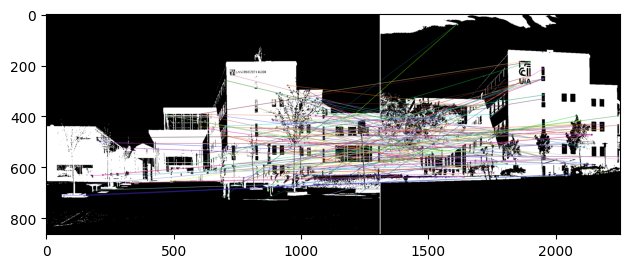

In [62]:
plt.imshow(img)
plt.tight_layout()
plt.savefig('outg.png')